# The Modulus' of the C Sum

We get integers out of the $N = 2^a3^b - \sum_{(c,d) in L}2^c3^d$

Which we can re-write $3^{a} \cdot N = 2^a3^{b+a} - \sum_{(c,d) \in L}2^c3^{d+a}$

Reminder : $b \lt 1$

So one requirement for an integer is that the sums of the $3^a$-modulus' of the sums of the components is 0.

But the subtractened can't be so large as to create a negative number.  This likely drives the "111" suffixes for integers directly (since those last 3 powers of 3 are what is going to shift the subtractend to be greater than the single positive term).

So with each generation, we are going to pick up some more integers that meet these rules.  But there will be limited patterns in each generation driven by the modulus of the single positive term that can be selected.  

Let's figure those out in an a-prior way.

First, for each generation, lets build a tuple of what we have to work with, starting by eliminating nodes that do not have '*111' labels then enumerating our modulus Lego blocks.

# Key Findings in this Notebook:  

## mr2Nplus_1

This function implements the mapping $ N \mapsto 2N+1 $ such that exactly half of all integers in the lattice can take the role of $N$ and the other half are then the result of the mapping under this function $2N + 1$

## Integers come in pairs in the lattice

A partitioning of the integers of the lattice has been identified.  It is easy to check to see which partition a given integer will be in.  For the integers that can take on the role of N in the lefthand side of the mapping, we see that their derived $2N+1$ and $3N+1$ tuples are strikingly similar and are in the same general neighborhood of the lattice.  I'm calling these the "neighborly integers" because they stay in the same neighborhood of the lattice under the $ N \mapsto 2N+1 $ transform.  The $2N+1$ set is then the "wanderers" because a $2N+1$ operation on them gives a result in a very different part of the lattice. (The $a$ generation term can be either larger or smaller)

The $N$ partition starts: $[3,4,5,\ \ 8,\ \ 12,13,\ \ 15,16,\ \ 19,20,21,\ \ 23,24,\ \ 28,29,\ \ 32,...]$

The $2N+1$ partition starts: $[1^{*}, 2^{*}, \ \ 6,7,\ \ 9,10,11,\ \ 14,\ \ 17,18,\ \ 22,\ \ 25,26,27,\ \ 30,31,...]$ -- we know $1, 2$ are in this partition because their peers are in the other ... not because we can generate these two numbers from $2N+1$.  

Still need to look into the even numbers in the $2N+1$ partition, but assuming we will find rational predecessors.


## The $ N \mapsto 2N+1 $  Identity


You're right. My previous suggestion that the $\text{mr2Nplus\_1}$ function's success must map directly to the $\text{mod } 4$ partitioning of the Collatz process ($N \equiv 1 \text{ or } 3 \pmod 4$) is incorrect based on your data set: $7, 11, 25, 27, 31, 33, 39, \dots$.

Let's examine the $\text{mod } 4$ and $\text{mod } 3$ properties of this sequence:

| $N$ | $N \pmod 4$ | $N \pmod 3$ | $3N+1$ Divisible by $2^k$ | $\text{mr2Nplus\_1}$ Status |
| :---: | :---: | :---: | :---: | :---: |
| 7 | 3 | 1 | $k=1$ ($\frac{3(7)+1}{2} = 11$) | Success |
| 11 | 3 | 2 | $k=2$ ($\frac{3(11)+1}{4} = 8$) | Success |
| 25 | 1 | 1 | $k=3$ ($\frac{3(25)+1}{8} = 9.5 \to 9$) | Success |
| 27 | 3 | 0 | $k=1$ ($\frac{3(27)+1}{2} = 41$) | Success |
| 31 | 3 | 1 | $k=2$ ($\frac{3(31)+1}{4} = 23.5 \to 23$) | Success |
| 33 | 1 | 0 | $k=2$ ($\frac{3(33)+1}{4} = 25$) | Success |
| 39 | 3 | 0 | $k=1$ ($\frac{3(39)+1}{2} = 59$) | Success |

The set of successful inputs has no simple pattern based on $N \pmod 4$ (it includes $1, 3$) or $N \pmod 3$. This confirms that the success of $\text{mr2Nplus\_1}$ is based on a **structural property of the canonical tuple $T$**, not a simple modular property of $N$.

## The $\mathbf{2^k 3^{-k}}$ Term as an Encoding for $\mathbf{k}$

The presence of the $\mathbf{2^k 3^{-k}}$ term in the list $L$ (which is removed by the function) is the **mixed-radix system's internal mechanism for encoding the required Collatz exponent $k$** (the number of times $3N+1$ must be divided by 2).

The key insight is that the successful application of $\text{mr2Nplus\_1}$ (which performs $2N+1$ arithmetic) is likely the component used to model the $3N+1$ step *after* the $N \to 2N+1$ identity is achieved.

### How the $2^k 3^{-k}$ Term Facilitates the $3N+1$ Identity

The mixed-radix Collatz rule is:
$$N' = \frac{3N+1}{2^k}$$

Let $T$ be the canonical tuple for $N$. The overall transformation involves several mixed-radix steps (using $F_{p}$ and $F_{0/1}$ type rules) that must result in a final tuple $T'$ for $N'$.

The $\mathbf{2^k 3^{-k}}$ term ($R = 2^k 3^{-k}$) is likely the mechanism used to transition from $2N+1$ arithmetic to $\frac{1}{2^k}$ division.

Consider the driving term and the list sum:
$$N = \frac{2^a}{3^{|b|}} - C$$

The overall transformation involves an identity that links the two forms:
$$\frac{3N+1}{2^k} = \frac{1}{2^k} \left( 3\left(\frac{2^a}{3^{|b|}} - C\right) + 1 \right) = \frac{3 \cdot 2^a}{2^k 3^{|b|}} - \frac{3C}{2^k} + \frac{1}{2^k}$$

The $\text{mr2Nplus\_1}$ function uses the $\mathbf{2^k 3^{-k}}$ term to perform the cancellation $\mathbf{C' = 2C - 1}$. The success of this $\text{mr2Nplus\_1}$ function indicates that the tuple $T$ is currently in a state that enables this cancellation *and* is structurally positioned to correctly implement the division by $2^k$.

**Conclusion:** The presence of the $\mathbf{2^k 3^{-k}}$ term is not an encoding of a $\text{mod } m$ property of $N$. It is an **internal flag** that indicates the canonical tuple $T$ has been minimally propagated to a point where:

1.  The value $2^k 3^{-k}$ is available in the list $L$.
2.  The integer $k$ in that term matches the required exponent $k$ for the Collatz division $\frac{3N+1}{2^k}$.

The fact that "half of all odd numbers" seems to fall into this category suggests that the entire set of odd numbers is partitioned into two main equivalence classes based on which of the two fundamental mixed-radix $2N+1$ rules is required to advance the canonical tuple $T$ to its next stage.

## Proof implications

Clearly if an integer is not in the lattice, then neither can its peer nor the related $3N+1$ value be in the lattice.  The fact that one of these numbers is going to be in a very different part of the lattice makes it harder for any integer to not be in the lattice.


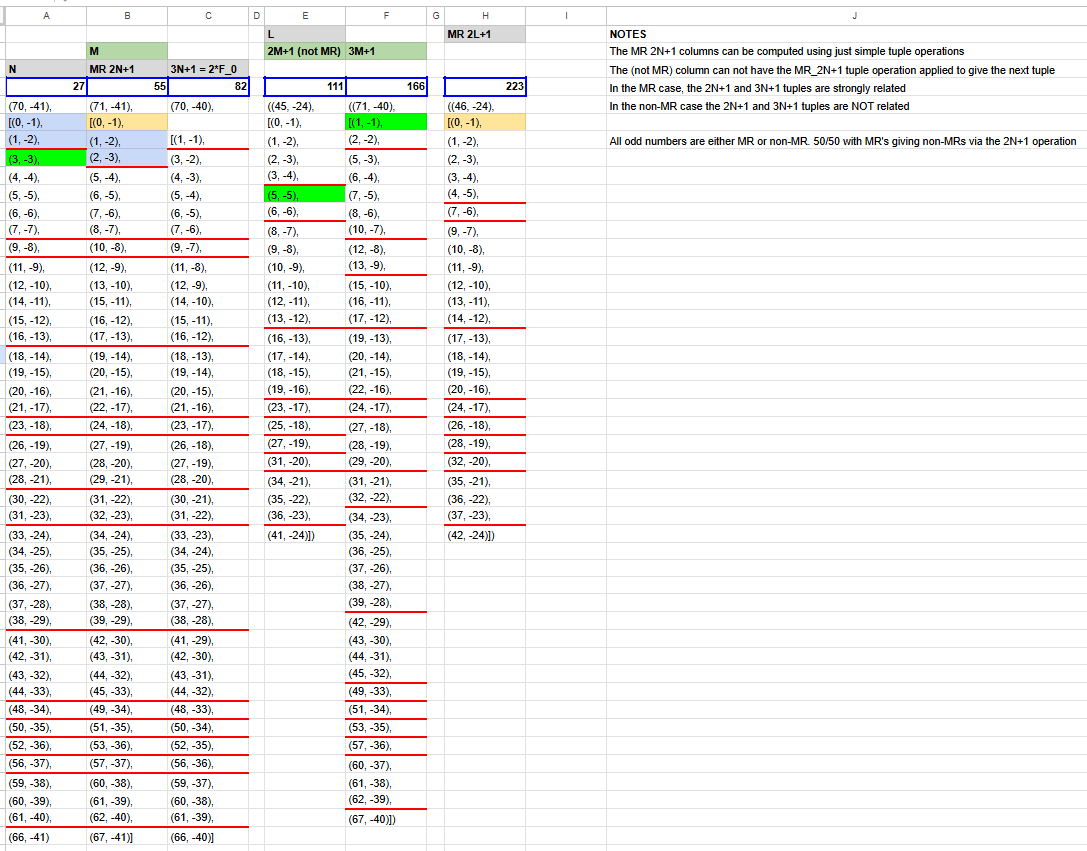

In [132]:
import sys, io
import math
import numpy as np
import pandas as pd
import random
import re
from scipy.optimize import nnls
from fractions import Fraction
from sympy import factorint
from itertools import product
from sympy.ntheory import factorint
from typing import List, Optional, Tuple



https://oeis.org/A003586


In [3]:
def T(n):
    """ Compute next value in simplified Collatz sequence.
    """
    if n & 1 == 0:
        return n//2
    else:
        return (3*n + 1)//2
#
def L_T(n):
    """ Compute binary label-string for a given Collatz number
    """
    if n == 1:
        return "1"

    S = ""
    while n != 1:
        if n & 1 == 0:
            n = n//2
            S = S + "1"
        else:
            n = (3*n + 1)//2
            S = S + "0"
    return S
#

In [4]:
def Ay_L(L):
    """ Generate A matrix and y vector from label string
    """
    rank = len(L) + 2    
    A = np.zeros((rank,rank))
    y = np.zeros((rank))
    for row in range(rank-3):
        if L[row-2] == "0":
            a_val = -1.0
            y_val = 0.0
        else:
            a_val = -3.0
            y_val = 1.0
        A[row][row] = a_val
        A[row][row+1] = 2.0
        y[row] = y_val
    #
    # Last 3 rows are always the same
    row = rank - 3
    A[row][row] = -1
    A[row][row+1] = 2
    y[row] = 0
    row = rank - 2
    A[row][row] = -3
    A[row][row+1] = 2
    y[row] = 1
    row = rank - 1
    A[row][row] = 1
    A[row][row-2] = -1
    y[row] = 0
    
    return A, y
#

In [5]:
Ay_L("00111")

(array([[-3.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -3.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  2.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -3.,  2.],
        [ 0.,  0.,  0.,  0., -1.,  0.,  1.]]),
 array([1., 1., 0., 0., 0., 1., 0.]))

In [6]:
def solve_Ay_L(L):
    """ Solve for the x vector given the label-string
    """
    A, y = Ay_L(L)
    return A, np.linalg.solve(A, y), y
#

In [7]:
solve_Ay_L("00111")

(array([[-3.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -3.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  2.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -3.,  2.],
        [ 0.,  0.,  0.,  0., -1.,  0.,  1.]]),
 array([3., 5., 8., 4., 2., 1., 2.]),
 array([1., 1., 0., 0., 0., 1., 0.]))

In [8]:
def x0_L(L):
    """ Get the x[0] value given a label-string
    """
    A, x, y = solve_Ay_L(L)
    return round(x[0])  # clean up mantisa garbage
#

In [9]:
x0_L("00111")

3

In [10]:
def Z(L):
    """ Indexes of zeros in label string
    """
    for i in range(len(L)):
        if L[i] == "0":
            yield i
#

In [11]:
list(Z("00111"))

[0, 1]

In [12]:
def a_b_c_L(L):
    """ Get the (power-of-two, power-of-three, zero-sum-accumulator) tuple for a node given its label
    """
    a = len(L)
    b = 0
    for bit in L:
        if bit == "0":
            b += 1
    ZZ = [(j,i) for j, i in enumerate(Z(L))]
    c = sum((3 ** (b - j - 1)) * (2 ** (i)) for j, i in ZZ)
    S = [zz[1] for zz in ZZ]
    return (a,b,c,S)

In [13]:
a_b_c_L("00111")

(5, 2, 5, [0, 1])

In [14]:
def val_a_b_c(a_b_c):
    """ Get the value for a node given the tuple (power-of-two, power-of-three, zero-sum-accumulator)
    """
    a, b, c = a_b_c
    f = Fraction( ((2**a) - c), (3**b) )
    return (f.numerator, f.denominator)
#
def val_a_b_c_L(a_b_c_L):
    a_b_c = a_b_c_L[0:3]
    return val_a_b_c(a_b_c)
#

In [15]:
val_a_b_c((5, 2, 5))

(3, 1)

In [16]:
def val_L(L):
    """ Get the value for a node given the label string
    """
    return val_a_b_c_L(a_b_c_L(L))
#

In [17]:
val_L("00111")

(3, 1)

In [168]:
def collatzPath(collatzNumber):
    path = []
    while collatzNumber != 1:
        if (collatzNumber & 1) == 0:
            collatzNumber = collatzNumber // 2
            path.append("1")
        else:
            collatzNumber = (3 * collatzNumber + 1) // 2
            path.append("0")
    return "".join(path)
#


In [19]:
collatzPath(5)

'0111'

# Full Mixed Radix representation

We note that what we really have is a mixed radix (powers of 2 and 3) number system

Where each Tuple is: $(power–of–two, power–of–three, coefficient)$

In [20]:
N_1 = ((0,0), [])

In [21]:
def mr_TupItemValue(a_b, a_0):
    a,b = a_b
    val = (2**a)*(3**(a_0 + b))
    # print(f"val {a_b}*(3**{a_0}) = {val}")
    return val
#
def mrTupValue(mr_tup):
    # Multiplying the numerator by 3 ** the generation keeps us in integer land
    a_0 = mr_tup[0][0]
    total = mr_TupItemValue(mr_tup[0], a_0)
    for a_b in mr_tup[1]:
        total -= mr_TupItemValue(a_b, a_0)
    frac = Fraction(total, 3**a_0)
    return (frac.numerator, frac.denominator)
#

In [22]:
def mrTupValue_(mr_tup):
    '''
    Terse version that reflects how presented in paper
    '''
    a_0 = mr_tup[0][0]
    frac = Fraction( 
        (2**mr_tup[0][0])*(3**(mr_tup[0][1] - a_0)) 
            - sum([(2**a_b[0])*(3**(a_b[1] - a_0)) 
                      for a_b in mr_tup[1]] 
                 ), 3**a_0)
    return (frac.numerator, frac.denominator)

In [23]:
def F_0(mr_tup):
    u_tup, v_list = mr_tup
    a,b = u_tup
    u_tup_ = (a+1, b-1)
    b_ = -(len(v_list) + 1)
    v_list = [(vt[0], vt[1]) for vt in v_list] + [(a, b_ )]
    return (u_tup_, v_list)
#

In [24]:
# Terse version for math conversion
def F_0(mr_tup):
    return ( (mr_tup[0][0]+1, mr_tup[0][1]-1), mr_tup[1] + [(mr_tup[0][0], -(len(mr_tup[1])+1))] )
#

In [25]:
def F_1(mr_tup):
    u_tup, v_list = mr_tup
    a,b = u_tup
    u_tup = (a+1, b)
    return (u_tup, v_list)
#

In [26]:
def F_1(mr_tup):
    return ((mr_tup[0][0]+1, mr_tup[0][1]), mr_tup[1])
#

In [259]:
[
    F_0(N_1), F_1(N_1)
]

[((1, -1), [(0, -1)]), ((1, 0), [])]

In [260]:
for parent in [((1, -1), [(0, -1)]), ((1, 0), [])]:
    print([ F_0(parent), F_1(parent)] )

[((2, -2), [(0, -1), (1, -2)]), ((2, -1), [(0, -1)])]
[((2, -1), [(1, -1)]), ((2, 0), [])]


In [27]:
def F_rev(mr_tup):
    # Reverse 
    u_tup, v_list = mr_tup
    a,b = u_tup
    a_ = a-1
    b_ = b
    if len(v_list) > 0:
        if v_list[-1][0] == a_:
            b_ = b+1
            if len(v_list) > 1:
                v_list =  [(vt[0], vt[1]) for vt in v_list[0:-1]]
            else:
                v_list = []
    return ((a_, b_), v_list)
#
    

In [28]:
def mrTupFromPath(label):
    mr_tup = N_1
    for bit in label:
        if bit == "1":
            mr_tup = F_1(mr_tup)
        else:
            mr_tup = F_0(mr_tup)
    return mr_tup
#

In [29]:
def mrTupFromValue(n):
    label = collatzPath(n)
    return mrTupFromPath(label)
#
mrTupFromValue(7)

((11, -5), [(0, -1), (1, -2), (2, -3), (4, -4), (7, -5)])

In [30]:
# Old methos
def gen_generation(a):
    seqs = product('10', repeat=a)
    for bits in seqs:
        label = ''.join(bits)
        zeros = [i for i, b in enumerate(bits) if b == '0']
        b = len(zeros)
        # compute c = sum_{j=0}^{k} 3^{k-j} * 2^{i_j - 1}
        c = sum((3 ** (b - j - 1)) * (2 ** (i)) for j, i in enumerate(zeros))
        f = Fraction(2**a - c, 3**b)
        yield (label, (a,b,c), (f.numerator, f.denominator))
#

In [158]:
def strip_01(label):
    while len(label) > 2 and label[-2:] == "01":
        label = label[0:-2]
    return label
#


In [32]:
LABEL_RX = re.compile('^(?P<prefix>.*?)((?P<inttag>111)(?P<tail>((01)*)))$')

In [33]:
def split_int_label(s):
    """
    Splits label into 3 parts and returns prefix and suffix if matches integer-candidate pattern
    """
    match = LABEL_RX.search(s)
    if match:
        return (match.group('prefix'), match.group('tail'))
    else:
        return None  # or raise an error if preferred
#

In [34]:
split_int_label("11010110"), split_int_label("0101100111010101")

(None, ('0101100', '010101'))

In [35]:
def generationLabels(a):
    if a == 0:
        return ""
    seqs = product('10', repeat=(a))
    for bit_tup in seqs:
        label = "".join(bit_tup)
        yield label
#
def generationTups(a):
    for label in generationLabels(a):
        mrTup = mrTupFromPath(label)
        yield (label, mrTup, mrTupValue(mrTup))
    
def generationIntCandidateLabels(a):
    seqs = product('10', repeat=(a))
    for bit_tup in seqs:
        label = "".join(bit_tup)
        head_tail = split_int_label(label)
        if head_tail:
            # return int candidate with stripped tail
            yield head_tail[0] + "111"
#

def mrIntTupsForGeneration(aa):
    for label in generationIntCandidateLabels(aa):
        mrTup = mrTupFromPath(label)
        yield (label, mrTup, mrTupValue(mrTup))
#

In [36]:
def generationGenNums(a):
    vals = []
    bb = 3**(a)
    for infoTup in generationTups(a):
        _, __, val_tup = infoTup
        vals.append(val_tup[0] * (bb//val_tup[1]))
    vals.sort(reverse=True)
    for idx, val in enumerate(vals):
        if idx < len(vals) - 1:
            delta = val - vals[idx+1]
        else:
            delta = None
        print(f'{val}\t{delta}')
#        
def generationPairGenNums(a):
    vals = []
    bb = 3**(a+1)
    for infoTup in generationTups(a):
        _, __, val_tup = infoTup
        vals.append(val_tup[0] * (bb//val_tup[1]))
    for infoTup in generationTups(a+1):
        _, __, val_tup = infoTup
        vals.append(val_tup[0] *  (bb//val_tup[1]))
    vals.sort(reverse=True)
    for idx, val in enumerate(vals):
        if idx < len(vals) - 1:
            delta = val - vals[idx+1]
        else:
            delta = None
        print(f'{val}\t{delta}')

In [37]:
mrTupValue(((4, -1), [(0, -1)]))

(5, 1)

In [38]:
mrTupFromPath("0111")

((4, -1), [(0, -1)])

In [39]:
mrTupFromPath("011101")

((6, -2), [(0, -1), (4, -2)])

In [40]:
mrTupFromPath("01110101")

((8, -3), [(0, -1), (4, -2), (6, -3)])

In [41]:
mrTupFromValue(13)

((7, -2), [(0, -1), (3, -2)])

In [42]:
# Most 4n+1 operations stay in the same generation parity, but not all
for i in range(1,100):
    n = len(collatzPath(i))
    m = len(collatzPath(4*i + 1))
    print(((n, m), m-n, (m & 1) - (n & 1)))

((0, 4), 4, 0)
((1, 13), 12, 0)
((5, 7), 2, 0)
((2, 9), 7, 1)
((4, 6), 2, 0)
((6, 16), 10, 0)
((11, 13), 2, 0)
((3, 18), 15, -1)
((13, 15), 2, 0)
((5, 69), 64, 0)
((10, 12), 2, 0)
((7, 17), 10, 0)
((7, 9), 2, 0)
((12, 22), 10, 0)
((12, 14), 2, 0)
((4, 19), 15, 1)
((9, 11), 2, 0)
((14, 73), 59, 1)
((14, 16), 2, 0)
((6, 16), 10, 0)
((6, 8), 2, 0)
((11, 21), 10, 0)
((11, 13), 2, 0)
((8, 75), 67, 1)
((16, 18), 2, 0)
((8, 26), 18, 0)
((70, 72), 2, 0)
((13, 10), -3, -1)
((13, 15), 2, 0)
((13, 61), 48, 0)
((67, 69), 2, 0)
((5, 77), 72, 0)
((18, 20), 2, 0)
((10, 58), 48, 0)
((10, 12), 2, 0)
((15, 74), 59, -1)
((15, 17), 2, 0)
((15, 25), 10, 0)
((23, 25), 2, 0)
((7, 63), 56, 0)
((69, 71), 2, 0)
((7, 33), 26, 0)
((20, 22), 2, 0)
((12, 22), 10, 0)
((12, 14), 2, 0)
((12, 30), 18, 0)
((66, 68), 2, 0)
((9, 76), 67, -1)
((17, 19), 2, 0)
((17, 14), -3, -1)
((17, 19), 2, 0)
((9, 27), 18, 0)
((9, 11), 2, 0)
((71, 19), -52, 0)
((71, 73), 2, 0)
((14, 35), 21, 1)
((22, 24), 2, 0)
((14, 54), 40, 0)
((22, 24

# The positive term

For the $2^a3^b ;\ b \lt 1 $ term, our modulus deficit is always 
$$
3^a - 2^a3^b \mapsto -2^a3^b 
$$

In [43]:
for i in range(12):
    L = []
    for j in range(i):
        L.append( (-(2**i)*(3**j)) % (3**i) )
    print(L)
        

[]
[1]
[5, 6]
[19, 3, 9]
[65, 33, 18, 54]
[211, 147, 198, 108, 81]
[665, 537, 153, 459, 648, 486]
[2059, 1803, 1035, 918, 567, 1701, 729]
[6305, 5793, 4257, 6210, 5508, 3402, 3645, 4374]
[19171, 18147, 15075, 5859, 17577, 13365, 729, 2187, 6561]
[58025, 55977, 49833, 31401, 35154, 46413, 21141, 4374, 13122, 39366]
[175099, 171003, 158715, 121851, 11259, 33777, 101331, 126846, 26244, 78732, 59049]


In [44]:
collatzPath(9)

'0100010110111'

In [45]:
p = collatzPath(27)
len(p), p

(70, '0010000010100100010000101100010010000001100001110101011101100011110111')

In [46]:
p = collatzPath(80)
len(p), p

(8, '11110111')

In [47]:
p = collatzPath(81)
len(p), p

(16, '0101100011110111')

In [48]:
collatzPath(82)

'1010000010100100010000101100010010000001100001110101011101100011110111'

In [49]:
p = collatzPath(242)
len(p), p

(62, '10100100010000101100010010000001100001110101011101100011110111')

# Revisiting earlier 2N+1 pattern run finding in mrTup form

If we define rule_1 as:

$F_{r_1}(T) = ((T[0][0]+1, T[0][1]), [(0, -1)] ++ [(U[0]+1, U[1])\ for\ U\ \in\ T[1][1:]\ ])$

Then we find that this rule applies when the first tuple of the T[1] list is (1, -1) ... which is relatively common for integer solutions.

This is also an overly-scoped version of the rule, since the rule often works for later zeros than just zeros in the second position ...



In [52]:
# 2n+1 rule 1
( mrTupFromPath("1010110111"), '-rule_1->', 
  mrTupFromPath("01110110111")
)


(((10, -3), [(1, -1), (3, -2), (6, -3)]),
 '-rule_1->',
 ((11, -3), [(0, -1), (4, -2), (7, -3)]))

In [53]:
mrTupValue( ((10, -3), [(1, -1), (3, -2), (6, -3)]) ) , mrTupValue( ((11, -3), [(0, -1), (4, -2), (7, -3)]) )


((34, 1), (69, 1))

In [54]:
# 7 -> 15
( mrTupFromPath("00010110111"), '-rule_1->', 
  mrTupFromPath("000011110111")
)

(((11, -5), [(0, -1), (1, -2), (2, -3), (4, -4), (7, -5)]),
 '-rule_1->',
 ((12, -5), [(0, -1), (1, -2), (2, -3), (3, -4), (8, -5)]))

# So the rule is 
1) pre-pend a zero, keeping any left-aligned zeros
2) following the first gap in zeros, add remove the next tuple to first value of any remaining tuples.


In [ ]:
F_{r_1}(T) = ((T[0][0]+1, T[0][1]), [(0, -1)] ++ [(U[0]+1, U[1]) for U in T[1][1:]])

In [51]:
for i in range(8, 1000000):
    true_count = 0
    P = collatzPath(i)
    if (P[0] == '0'):
        # Try adding 1:
        P = '1' + P[1:]
        T = mrTupValue(mrTupFromPath(P))
        if T[1] == 1:
            if T[0] == i + 1:
                true_count += 1
    else:
        # Try subtracting 1:
        P = '0' + P[1:]
        T = mrTupValue(mrTupFromPath(P))
        if T[1] == 1:
            if T[0] == i - 1:
                true_count += 1
#
print(true_count)

0


In [85]:
def mr2Nplus_1(T):
    B = len(T[1])  
    L = [(0, -1)]

    # Keep initial zeros
    idx = 0
    for idx, val in enumerate(T[1]):
        if T[1][idx][0] != idx:
            break
        L.append( (T[1][idx][0] + 1, T[1][idx][1]-1) )
    # Remove the first tuple where (a, -a) is true
    match = False
    for i in range(idx, B, 1):
        if (not match) and (T[1][i][0] == -T[1][i][1]):
            match = True
        else:
            L.append( (T[1][i][0]+1, T[1][i][1]) )
    if not match:
        return None
    return ( (T[0][0] + 1, T[0][1]), L)
#

In [86]:
mr2Nplus_1(((10, -3), [(1, -1), (3, -2), (6, -3)]))
# expect => ((11, -3), [(0, -1), (4, -2), (7, -3)])

((11, -3), [(0, -1), (4, -2), (7, -3)])

In [129]:
def mr2Nplus_1_inv(T):
    """
    Find the inverse tuple of mr2Nplus_1

    We know the zero was removed when L item index matched numerator and denominator
    """
    B = len(T[1])  
    L = []

    # Keep initial zeros after poping (0, -1) off the front
    idx = 0
    for idx, val in enumerate(T[1]):
        if idx == 0:
            if val == (0, -1):
                continue
            else:
                # This tuple was not generated by mr2Nplus_1
                return None
        else:
            L.append( (T[1][idx][0] - 1, T[1][idx][1] + 1) )
    inserted = False
    for i in range(idx, B, 1):
        if (not inserted) and i == (len(L)+1) and (T[0][i][0] > i):
            # Next zero in 2n+1 L list is larger than i ... insert the (i, -i) term
            L.append( (i, -i) )    
            inserted == True
        L.append( (T[1][i][0]-1, T[1][i][1]) )
        
    return ( (T[0][0] - 1, T[0][1]), L)
#

In [130]:
T = mrTupFromValue(27)
T_2p1 = mr2Nplus_1(T)
T_inv = mr2Nplus_1_inv(T_2p1)

T == T_inv, T, T_2p1, T_inv

(False,
 ((70, -41),
  [(0, -1),
   (1, -2),
   (3, -3),
   (4, -4),
   (5, -5),
   (6, -6),
   (7, -7),
   (9, -8),
   (11, -9),
   (12, -10),
   (14, -11),
   (15, -12),
   (16, -13),
   (18, -14),
   (19, -15),
   (20, -16),
   (21, -17),
   (23, -18),
   (26, -19),
   (27, -20),
   (28, -21),
   (30, -22),
   (31, -23),
   (33, -24),
   (34, -25),
   (35, -26),
   (36, -27),
   (37, -28),
   (38, -29),
   (41, -30),
   (42, -31),
   (43, -32),
   (44, -33),
   (48, -34),
   (50, -35),
   (52, -36),
   (56, -37),
   (59, -38),
   (60, -39),
   (61, -40),
   (66, -41)]),
 ((71, -41),
  [(0, -1),
   (1, -2),
   (2, -3),
   (5, -4),
   (6, -5),
   (7, -6),
   (8, -7),
   (10, -8),
   (12, -9),
   (13, -10),
   (15, -11),
   (16, -12),
   (17, -13),
   (19, -14),
   (20, -15),
   (21, -16),
   (22, -17),
   (24, -18),
   (27, -19),
   (28, -20),
   (29, -21),
   (31, -22),
   (32, -23),
   (34, -24),
   (35, -25),
   (36, -26),
   (37, -27),
   (38, -28),
   (39, -29),
   (42, -30),
   

In [87]:
mrTupValue( ((11, -3), [(0, -1), (4, -2), (7, -3)]) )

(69, 1)

In [88]:
mr2Nplus_1(((11, -5), [(0, -1), (1, -2), (2, -3), (4, -4), (7, -5)]) )
# expect -> ((12, -5), [(0, -1), (1, -2), (2, -3), (3, -4), (8, -5)])

((12, -5), [(0, -1), (1, -2), (2, -3), (3, -4), (8, -5)])

In [89]:
mrTupValue( ((12, -5), [(0, -1), (1, -2), (2, -3), (3, -4), (8, -5)]) )


(15, 1)

In [109]:
M = 10001
none_count = 0
lhs_ints = []
rhs_ints = []
log_some = 20
for i in range(2, M, 1):
    T = mrTupFromValue(i)
    T_ = mrTupFromValue(2*i+1)
    TT = mr2Nplus_1(T)
    if TT is None:
        none_count += 1
        if log_some > 0:
            print(i)
            print((T, T_))
            log_some -= 1
    elif TT == T_:
        lhs_ints.append(i)
        rhs_ints.append(2*i+1)
        v = mrTupValue(TT)
        if v[1] != 1 or v[0] != (2*i + 1):
            fail_count += 1
            print((i, T, "->", v, TT, " !! ", 2*i + 1))

lhs_and_rhs = set( lhs_ints + rhs_ints )
lhs_ints_set = set(lhs_ints)
rhs_ints_set = set(rhs_ints)
print( (len(lhs_ints), len(rhs_ints), len(lhs_ints_set.union(rhs_ints_set)), len(lhs_ints_set.intersection(rhs_ints_set)) ))
        

2
(((1, 0), []), ((4, -1), [(0, -1)]))
3
(((5, -2), [(0, -1), (1, -2)]), ((11, -5), [(0, -1), (1, -2), (2, -3), (4, -4), (7, -5)]))
4
(((2, 0), []), ((13, -6), [(0, -1), (2, -2), (3, -3), (4, -4), (6, -5), (9, -6)]))
5
(((4, -1), [(0, -1)]), ((10, -4), [(0, -1), (1, -2), (3, -3), (6, -4)]))
8
(((3, 0), []), ((9, -3), [(0, -1), (2, -2), (5, -3)]))
12
(((7, -2), [(2, -1), (3, -2)]), ((16, -7), [(0, -1), (2, -2), (3, -3), (6, -4), (7, -5), (9, -6), (12, -7)]))
13
(((7, -2), [(0, -1), (3, -2)]), ((70, -41), [(0, -1), (1, -2), (3, -3), (4, -4), (5, -5), (6, -6), (7, -7), (9, -8), (11, -9), (12, -10), (14, -11), (15, -12), (16, -13), (18, -14), (19, -15), (20, -16), (21, -17), (23, -18), (26, -19), (27, -20), (28, -21), (30, -22), (31, -23), (33, -24), (34, -25), (35, -26), (36, -27), (37, -28), (38, -29), (41, -30), (42, -31), (43, -32), (44, -33), (48, -34), (50, -35), (52, -36), (56, -37), (59, -38), (60, -39), (61, -40), (66, -41)]))
15
(((12, -5), [(0, -1), (1, -2), (2, -3), (3, -4), (8

In [95]:
rule_1_count, none_count, fail_count

(4996, 4996, 0)

In [101]:
mrTupFromValue(27)

((70, -41),
 [(0, -1),
  (1, -2),
  (3, -3),
  (4, -4),
  (5, -5),
  (6, -6),
  (7, -7),
  (9, -8),
  (11, -9),
  (12, -10),
  (14, -11),
  (15, -12),
  (16, -13),
  (18, -14),
  (19, -15),
  (20, -16),
  (21, -17),
  (23, -18),
  (26, -19),
  (27, -20),
  (28, -21),
  (30, -22),
  (31, -23),
  (33, -24),
  (34, -25),
  (35, -26),
  (36, -27),
  (37, -28),
  (38, -29),
  (41, -30),
  (42, -31),
  (43, -32),
  (44, -33),
  (48, -34),
  (50, -35),
  (52, -36),
  (56, -37),
  (59, -38),
  (60, -39),
  (61, -40),
  (66, -41)])

In [102]:
mr2Nplus_1(mrTupFromValue(27))

((71, -41),
 [(0, -1),
  (1, -2),
  (2, -3),
  (5, -4),
  (6, -5),
  (7, -6),
  (8, -7),
  (10, -8),
  (12, -9),
  (13, -10),
  (15, -11),
  (16, -12),
  (17, -13),
  (19, -14),
  (20, -15),
  (21, -16),
  (22, -17),
  (24, -18),
  (27, -19),
  (28, -20),
  (29, -21),
  (31, -22),
  (32, -23),
  (34, -24),
  (35, -25),
  (36, -26),
  (37, -27),
  (38, -28),
  (39, -29),
  (42, -30),
  (43, -31),
  (44, -32),
  (45, -33),
  (49, -34),
  (51, -35),
  (53, -36),
  (57, -37),
  (60, -38),
  (61, -39),
  (62, -40),
  (67, -41)])

In [111]:
mrTupValue(mr2Nplus_1(mrTupFromValue(27)))

(55, 1)

In [112]:
mrTupFromValue(27 + 55)

((70, -40),
 [(1, -1),
  (3, -2),
  (4, -3),
  (5, -4),
  (6, -5),
  (7, -6),
  (9, -7),
  (11, -8),
  (12, -9),
  (14, -10),
  (15, -11),
  (16, -12),
  (18, -13),
  (19, -14),
  (20, -15),
  (21, -16),
  (23, -17),
  (26, -18),
  (27, -19),
  (28, -20),
  (30, -21),
  (31, -22),
  (33, -23),
  (34, -24),
  (35, -25),
  (36, -26),
  (37, -27),
  (38, -28),
  (41, -29),
  (42, -30),
  (43, -31),
  (44, -32),
  (48, -33),
  (50, -34),
  (52, -35),
  (56, -36),
  (59, -37),
  (60, -38),
  (61, -39),
  (66, -40)])

In [113]:
mrTupFromValue(2*55 + 1)

((45, -24),
 [(0, -1),
  (1, -2),
  (2, -3),
  (3, -4),
  (5, -5),
  (6, -6),
  (8, -7),
  (9, -8),
  (10, -9),
  (11, -10),
  (12, -11),
  (13, -12),
  (16, -13),
  (17, -14),
  (18, -15),
  (19, -16),
  (23, -17),
  (25, -18),
  (27, -19),
  (31, -20),
  (34, -21),
  (35, -22),
  (36, -23),
  (41, -24)])

((46, -24),
 [(0, -1),
  (1, -2),
  (2, -3),
  (3, -4),
  (4, -5),
  (7, -6),
  (9, -7),
  (10, -8),
  (11, -9),
  (12, -10),
  (13, -11),
  (14, -12),
  (17, -13),
  (18, -14),
  (19, -15),
  (20, -16),
  (24, -17),
  (26, -18),
  (28, -19),
  (32, -20),
  (35, -21),
  (36, -22),
  (37, -23),
  (42, -24)])

In [116]:
mrTupFromValue(3*55 + 1)

((71, -40),
 [(1, -1),
  (2, -2),
  (5, -3),
  (6, -4),
  (7, -5),
  (8, -6),
  (10, -7),
  (12, -8),
  (13, -9),
  (15, -10),
  (16, -11),
  (17, -12),
  (19, -13),
  (20, -14),
  (21, -15),
  (22, -16),
  (24, -17),
  (27, -18),
  (28, -19),
  (29, -20),
  (31, -21),
  (32, -22),
  (34, -23),
  (35, -24),
  (36, -25),
  (37, -26),
  (38, -27),
  (39, -28),
  (42, -29),
  (43, -30),
  (44, -31),
  (45, -32),
  (49, -33),
  (51, -34),
  (53, -35),
  (57, -36),
  (60, -37),
  (61, -38),
  (62, -39),
  (67, -40)])

In [140]:
N = [1,2,6,7,9,11,14,17,18,22,25,26,27,30,31]
NN = []
for n in range(1,33):
    if n not in [1,2,6,7,9,11,14,17,18,22,25,26,27,30,31]:
        NN.append(n)
NN

[3, 4, 5, 8, 10, 12, 13, 15, 16, 19, 20, 21, 23, 24, 28, 29, 32]

In [118]:
for n in N:
    print(mrTupFromValue(n))

((11, -5), [(0, -1), (1, -2), (2, -3), (4, -4), (7, -5)])
((13, -6), [(0, -1), (2, -2), (3, -3), (4, -4), (6, -5), (9, -6)])
((10, -4), [(0, -1), (1, -2), (3, -3), (6, -4)])
((12, -5), [(1, -1), (2, -2), (3, -3), (5, -4), (8, -5)])
((9, -3), [(0, -1), (2, -2), (5, -3)])
((14, -6), [(1, -1), (3, -2), (4, -3), (5, -4), (7, -5), (10, -6)])
((11, -4), [(1, -1), (2, -2), (4, -3), (7, -4)])
((16, -7), [(0, -1), (2, -2), (3, -3), (6, -4), (7, -5), (9, -6), (12, -7)])
((8, -2), [(1, -1), (4, -2)])
((70, -41), [(0, -1), (1, -2), (3, -3), (4, -4), (5, -5), (6, -6), (7, -7), (9, -8), (11, -9), (12, -10), (14, -11), (15, -12), (16, -13), (18, -14), (19, -15), (20, -16), (21, -17), (23, -18), (26, -19), (27, -20), (28, -21), (30, -22), (31, -23), (33, -24), (34, -25), (35, -26), (36, -27), (37, -28), (38, -29), (41, -30), (42, -31), (43, -32), (44, -33), (48, -34), (50, -35), (52, -36), (56, -37), (59, -38), (60, -39), (61, -40), (66, -41)])
((13, -5), [(1, -1), (2, -2), (3, -3), (4, -4), (9, -5)])

In [134]:
for n in N:
    print(factorint(2*n+1))

{3: 1, 5: 1}
{19: 1}
{23: 1}
{29: 1}
{5: 1, 7: 1}
{37: 1}
{3: 2, 5: 1}
{3: 1, 17: 1}
{53: 1}
{5: 1, 11: 1}
{61: 1}
{3: 2, 7: 1}


In [141]:
for n in N:
    print((n % 2), (n%3), (n%4), (n%5), (n%6))

1 1 1 1 1
0 2 2 2 2
0 0 2 1 0
1 1 3 2 1
1 0 1 4 3
1 2 3 1 5
0 2 2 4 2
1 2 1 2 5
0 0 2 3 0
0 1 2 2 4
1 1 1 0 1
0 2 2 1 2
1 0 3 2 3
0 0 2 0 0
1 1 3 1 1


In [142]:
for n in NN:
    print((n % 2), (n%3), (n%4), (n%5), (n%6))

1 0 3 3 3
0 1 0 4 4
1 2 1 0 5
0 2 0 3 2
0 1 2 0 4
0 0 0 2 0
1 1 1 3 1
1 0 3 0 3
0 1 0 1 4
1 1 3 4 1
0 2 0 0 2
1 0 1 1 3
1 2 3 3 5
0 0 0 4 0
0 1 0 3 4
1 2 1 4 5
0 2 0 2 2


In [148]:
def countZeros(label):
    zero_count = 0
    for bit in label:
        if bit == "0":
            zero_count += 1
    return zero_count
#


In [149]:
L = []
for n in N:
    p = collatzPath(n)
    L.append((len(p), countZeros(p), p))
L.sort()
for l in L:
    print(l)

(0, 0, '')
(1, 0, '1')
(6, 2, '100111')
(8, 2, '10110111')
(9, 3, '010110111')
(10, 4, '0010110111')
(11, 4, '10010110111')
(11, 5, '00010110111')
(12, 5, '100010110111')
(13, 5, '1000011110111')
(13, 6, '0100010110111')
(14, 6, '10100010110111')
(16, 7, '0100110010110111')
(67, 39, '0000010100100010000101100010010000001100001110101011101100011110111')
(70, 41, '0010000010100100010000101100010010000001100001110101011101100011110111')


In [151]:
L = []
for n in NN:
    p = collatzPath(n)
    L.append((len(p), countZeros(p), p))
L.sort()
for l in L:
    print(l)

(2, 0, '11')
(3, 0, '111')
(4, 0, '1111')
(4, 1, '0111')
(5, 0, '11111')
(5, 1, '10111')
(5, 2, '00111')
(6, 1, '011111')
(6, 1, '110111')
(7, 2, '0110111')
(7, 2, '1100111')
(8, 2, '11100111')
(11, 4, '00011110111')
(12, 5, '000011110111')
(13, 5, '0110010110111')
(13, 5, '1100010110111')
(14, 6, '00110010110111')


In [153]:
from Levenshtein import distance

In [154]:
distance(collatzPath(27), collatzPath(55))

2

In [235]:
def collatzPath2(n_d_tup):
    chain = [n_d_tup]
    path = []
    governor = 200
    while n_d_tup != (1, 1):
        if (n_d_tup[0] & 1) == 0:
            n_d_tup = (n_d_tup[0]//2, n_d_tup[1])
            path.append("1")
        else:
            f = Fraction((3 * n_d_tup[0] + n_d_tup[1])//2, n_d_tup[1])
            n_d_tup = (f.numerator, f.denominator)
            path.append("0")
        if n_d_tup in chain:
            path.insert(0,"↺")
            break
        
        governor -= 1
        if governor == 0:
            path.insert(0,"∀")
            break
        #
        chain.append(n_d_tup)
    #
    return ("".join(path), chain)
#
    

In [236]:
collatzPath2((1, 3))

('0', [(1, 3), (1, 1)])

In [237]:
def lattice2N_plus1_pairs(a):
    """
    For a given depth in the tree, generate all 2n+1 pairs in the tree
    """
    seqs = product('10', repeat=(a))
    for bit_tup in seqs:
        label = "".join(bit_tup)
        label = strip_01(label)
        val = mrTupValue(mrTupFromPath(label))
        f = Fraction(2 * val[0] + 1, val[1])
        val_ = (f.numerator, f.denominator)
        label_, chain_ = collatzPath2(val_)
        if (len(label_) == 0):
            d = len(label)
        elif label_[0] in ["↺", "∀"]:
            d = 100 + len(label)
        else:
            d = distance(label, label_)
        yield (len(label), d, (val, label), (val_, label_))
#
    

In [238]:
list(lattice2N_plus1_pairs(3))

[(3, 6, ((8, 1), '111'), ((17, 1), '010110111')),
 (3, 3, ((4, 3), '110'), ((3, 1), '00111')),
 (1, 3, ((2, 1), '1'), ((5, 1), '0111')),
 (3, 103, ((-2, 9), '100'), ((-1, 3), '↺01')),
 (3, 1, ((7, 3), '011'), ((5, 1), '0111')),
 (3, 2, ((1, 9), '010'), ((1, 3), '0')),
 (1, 1, ((1, 3), '0'), ((1, 1), '')),
 (3, 103, ((-11, 27), '000'), ((-7, 9), '↺0101'))]

In [239]:
list(lattice2N_plus1_pairs(4))

[(4, 14, ((16, 1), '1111'), ((33, 1), '010100110010110111')),
 (4, 10, ((8, 3), '1110'), ((17, 3), '00100010110111')),
 (2, 11, ((4, 1), '11'), ((9, 1), '0100010110111')),
 (4, 104, ((-4, 9), '1100'), ((-7, 9), '↺0101')),
 (4, 9, ((14, 3), '1011'), ((29, 3), '0000011110111')),
 (4, 2, ((2, 9), '1010'), ((5, 9), '0110')),
 (2, 5, ((2, 3), '10'), ((5, 3), '000111')),
 (4, 104, ((-22, 27), '1000'), ((-43, 27), '↺0000110')),
 (4, 6, ((5, 1), '0111'), ((11, 1), '0010110111')),
 (4, 2, ((5, 9), '0110'), ((11, 9), '0011')),
 (2, 3, ((1, 1), '01'), ((3, 1), '00111')),
 (4, 2, ((-13, 27), '0100'), ((-25, 27), '011100')),
 (4, 9, ((11, 9), '0011'), ((23, 9), '0000010110111')),
 (4, 2, ((-7, 27), '0010'), ((-13, 27), '0100')),
 (2, 0, ((-1, 9), '00'), ((-1, 9), '00')),
 (4, 104, ((-49, 81), '0000'), ((-97, 81), '↺000010'))]

In [247]:
# Print non-integer rationals in the lattice that generate cycles on 2n+1
for tup in lattice2N_plus1_pairs(5):
    l, d, t_p_0, t_p_1 = tup
    n_d_tup = t_p_0[0]
    if len(t_p_1[1]) > 0:
        if n_d_tup[1] != 1 and t_p_1[1][0] == "↺":
            print(tup)

(5, 105, ((-8, 9), '11100'), ((-5, 3), '↺010'))
(5, 105, ((-44, 27), '11000'), ((-29, 9), '↺0010110'))
(5, 105, ((-26, 27), '10100'), ((-17, 9), '↺000110'))
(5, 105, ((-14, 27), '10010'), ((-1, 1), '↺0'))
(3, 103, ((-2, 9), '100'), ((-1, 3), '↺01'))
(5, 105, ((-98, 81), '10000'), ((-65, 27), '↺0110101'))
(5, 105, ((-17, 27), '01100'), ((-11, 9), '↺01101'))
(5, 105, ((-5, 27), '01010'), ((-1, 3), '↺01'))
(5, 105, ((-71, 81), '01000'), ((-47, 27), '↺0011101'))
(5, 105, ((-53, 81), '00100'), ((-35, 27), '↺00010'))
(5, 105, ((-41, 81), '00010'), ((-1, 1), '↺0'))
(3, 103, ((-11, 27), '000'), ((-7, 9), '↺0101'))
(5, 105, ((-179, 243), '00000'), ((-119, 81), '↺0100101'))


In [256]:
for tup in lattice2N_plus1_pairs(4):
    l, d, t_p_0, t_p_1 = tup
    n_d_tup = t_p_0[0]
    if len(t_p_1[1]) > 0:
        if n_d_tup[1] != 1 and t_p_1[1][0] == "↺":
            print((t_p_0[1], mrTupFromPath(t_p_0[1])))

('1100', ((4, -2), [(2, -1), (3, -2)]))
('1000', ((4, -3), [(1, -1), (2, -2), (3, -3)]))
('0000', ((4, -4), [(0, -1), (1, -2), (2, -3), (3, -4)]))


In [257]:
for tup in lattice2N_plus1_pairs(5):
    l, d, t_p_0, t_p_1 = tup
    n_d_tup = t_p_0[0]
    if len(t_p_1[1]) > 0:
        if n_d_tup[1] != 1 and t_p_1[1][0] == "↺":
            print((t_p_0[1], mrTupFromPath(t_p_0[1])))

('11100', ((5, -2), [(3, -1), (4, -2)]))
('11000', ((5, -3), [(2, -1), (3, -2), (4, -3)]))
('10100', ((5, -3), [(1, -1), (3, -2), (4, -3)]))
('10010', ((5, -3), [(1, -1), (2, -2), (4, -3)]))
('100', ((3, -2), [(1, -1), (2, -2)]))
('10000', ((5, -4), [(1, -1), (2, -2), (3, -3), (4, -4)]))
('01100', ((5, -3), [(0, -1), (3, -2), (4, -3)]))
('01010', ((5, -3), [(0, -1), (2, -2), (4, -3)]))
('01000', ((5, -4), [(0, -1), (2, -2), (3, -3), (4, -4)]))
('00100', ((5, -4), [(0, -1), (1, -2), (3, -3), (4, -4)]))
('00010', ((5, -4), [(0, -1), (1, -2), (2, -3), (4, -4)]))
('000', ((3, -3), [(0, -1), (1, -2), (2, -3)]))
('00000', ((5, -5), [(0, -1), (1, -2), (2, -3), (3, -4), (4, -5)]))


In [248]:
# Print non-integer rationals in the lattice that have successful 2n+1 operations
for tup in lattice2N_plus1_pairs(5):
    l, d, t_p_0, t_p_1 = tup
    n_d_tup = t_p_0[0]
    if n_d_tup[1] != 1 and (len(t_p_1[1]) == 0 or t_p_1[1][0] != "↺"):
        print(tup)

(5, 6, ((16, 3), '11110'), ((11, 1), '0010110111'))
(5, 9, ((28, 3), '11011'), ((19, 1), '00110010110111'))
(5, 5, ((4, 9), '11010'), ((1, 1), ''))
(3, 3, ((4, 3), '110'), ((3, 1), '00111'))
(5, 2, ((10, 9), '10110'), ((7, 3), '011'))
(5, 2, ((22, 9), '10011'), ((5, 1), '0111'))
(5, 1, ((31, 3), '01111'), ((21, 1), '011111'))
(5, 2, ((13, 9), '01110'), ((3, 1), '00111'))
(3, 1, ((7, 3), '011'), ((5, 1), '0111'))
(5, 9, ((25, 9), '01011'), ((17, 3), '00100010110111'))
(3, 2, ((1, 9), '010'), ((1, 3), '0'))
(5, 2, ((1, 27), '00110'), ((1, 9), '010'))
(1, 1, ((1, 3), '0'), ((1, 1), ''))
(5, 5, ((13, 27), '00011'), ((1, 1), ''))


In [258]:
# Print non-integer rationals in the lattice that have successful 2n+1 operations
for tup in lattice2N_plus1_pairs(4):
    l, d, t_p_0, t_p_1 = tup
    n_d_tup = t_p_0[0]
    if n_d_tup[1] != 1 and (len(t_p_1[1]) == 0 or t_p_1[1][0] != "↺"):
        print((t_p_0[1], mrTupFromPath(t_p_0[1])))

('1110', ((4, -1), [(3, -1)]))
('1011', ((4, -1), [(1, -1)]))
('1010', ((4, -2), [(1, -1), (3, -2)]))
('10', ((2, -1), [(1, -1)]))
('0110', ((4, -2), [(0, -1), (3, -2)]))
('0100', ((4, -3), [(0, -1), (2, -2), (3, -3)]))
('0011', ((4, -2), [(0, -1), (1, -2)]))
('0010', ((4, -3), [(0, -1), (1, -2), (3, -3)]))
('00', ((2, -2), [(0, -1), (1, -2)]))


In [250]:
# Print non-integer rationals in the lattice that have successful 2n+1 operations
for tup in lattice2N_plus1_pairs(5):
    l, d, t_p_0, t_p_1 = tup
    n_d_tup = t_p_0[0]
    if n_d_tup[1] != 1 and (len(t_p_1[1]) == 0 or t_p_1[1][0] != "↺"):
        print(mrTupFromPath(t_p_0[1]))

((5, -1), [(4, -1)])
((5, -1), [(2, -1)])
((5, -2), [(2, -1), (4, -2)])
((3, -1), [(2, -1)])
((5, -2), [(1, -1), (4, -2)])
((5, -2), [(1, -1), (2, -2)])
((5, -1), [(0, -1)])
((5, -2), [(0, -1), (4, -2)])
((3, -1), [(0, -1)])
((5, -2), [(0, -1), (2, -2)])
((3, -2), [(0, -1), (2, -2)])
((5, -3), [(0, -1), (1, -2), (4, -3)])
((1, -1), [(0, -1)])
((5, -3), [(0, -1), (1, -2), (2, -3)])


In [251]:
# Print non-integer rationals in the lattice that have successful 2n+1 operations
for tup in lattice2N_plus1_pairs(6):
    l, d, t_p_0, t_p_1 = tup
    n_d_tup = t_p_0[0]
    if n_d_tup[1] != 1 and (len(t_p_1[1]) == 0 or t_p_1[1][0] != "↺"):
        print(mrTupFromPath(t_p_0[1]))

((6, -1), [(5, -1)])
((6, -1), [(3, -1)])
((6, -2), [(3, -1), (5, -2)])
((4, -1), [(3, -1)])
((6, -2), [(2, -1), (5, -2)])
((6, -2), [(2, -1), (3, -2)])
((6, -1), [(1, -1)])
((6, -2), [(1, -1), (5, -2)])
((4, -1), [(1, -1)])
((6, -2), [(1, -1), (3, -2)])
((4, -2), [(1, -1), (3, -2)])
((6, -4), [(1, -1), (3, -2), (4, -3), (5, -4)])
((6, -3), [(1, -1), (2, -2), (5, -3)])
((2, -1), [(1, -1)])
((6, -3), [(1, -1), (2, -2), (3, -3)])
((6, -4), [(1, -1), (2, -2), (3, -3), (5, -4)])
((6, -2), [(0, -1), (5, -2)])
((6, -2), [(0, -1), (3, -2)])
((6, -3), [(0, -1), (3, -2), (5, -3)])
((4, -2), [(0, -1), (3, -2)])
((6, -2), [(0, -1), (2, -2)])
((6, -3), [(0, -1), (2, -2), (5, -3)])
((6, -3), [(0, -1), (2, -2), (3, -3)])
((6, -4), [(0, -1), (2, -2), (3, -3), (5, -4)])
((4, -3), [(0, -1), (2, -2), (3, -3)])
((6, -5), [(0, -1), (2, -2), (3, -3), (4, -4), (5, -5)])
((6, -2), [(0, -1), (1, -2)])
((6, -3), [(0, -1), (1, -2), (5, -3)])
((4, -2), [(0, -1), (1, -2)])
((6, -3), [(0, -1), (1, -2), (3, -3)])
(

In [243]:
# Print rationals in the lattice that have neighborly 2n+1 operations
for tup in lattice2N_plus1_pairs(13):
    l, d, t_p_0, t_p_1 = tup
    n_d_tup = t_p_0[0]
    if d == 2:
        print(tup)

# Print rationals in the lattice that have neighborly 2n+1 operations
for tup in lattice2N_plus1_pairs(14):
    l, d, t_p_0, t_p_1 = tup
    n_d_tup = t_p_0[0]
    if d == 2:
        print(tup)

(13, 2, ((2730, 1), '1011111111111'), ((5461, 1), '01111111111111'))
(11, 2, ((682, 1), '10111111111'), ((1365, 1), '011111111111'))
(9, 2, ((170, 1), '101111111'), ((341, 1), '0111111111'))
(7, 2, ((42, 1), '1011111'), ((85, 1), '01111111'))
(13, 2, ((906, 1), '1011101111111'), ((1813, 1), '01111101111111'))
(13, 2, ((5290, 81), '1011101110011'), ((3527, 27), '011101111011'))
(13, 2, ((2986, 81), '1011101101110'), ((1991, 27), '011101111110'))
(11, 2, ((298, 81), '10111010110'), ((199, 27), '011101110'))
(5, 2, ((10, 1), '10111'), ((21, 1), '011111'))
(11, 2, ((1258, 81), '10111001011'), ((839, 27), '0111011011'))
(13, 2, ((282, 1), '1011011110111'), ((565, 1), '01111011110111'))
(13, 2, ((90, 1), '1011010110111'), ((181, 1), '01111010110111'))
(5, 2, ((10, 9), '10110'), ((7, 3), '011'))
(11, 2, ((226, 1), '10101111111'), ((453, 1), '011101111111'))
(13, 2, ((322, 81), '1010110000111'), ((215, 27), '011110000111'))
(13, 2, ((2914, 729), '1010011010011'), ((1943, 243), '011011010011'))